In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset

df1 = pd.read_csv('../data/products.csv')
#display(df1.head())
print(df1.shape)
df2 = pd.read_csv('../data/aisles.csv')
#display(df2.head())
print(df2.shape)
df3 = pd.read_csv('../data/departments.csv')
#display(df3.head())
print(df3.shape)
df4 = pd.read_csv('../data/order_products__train.csv')
#display(df4.head())
print(df4.shape)
df5 = pd.read_csv('../data/orders.csv')
#display(df5.head())
print(df5.shape)

(49688, 4)
(134, 2)
(21, 2)
(1384617, 4)
(3421083, 7)


In [4]:
df12 = pd.merge(df2, df1, how='inner', on='aisle_id')
df123 = pd.merge(df12, df3, how='inner', on='department_id')
df1234 = pd.merge(df4, df123, how='inner', on='product_id')
df12345 = pd.merge(df5, df1234, how='inner', on='order_id')

df = df12345.drop(['aisle_id','department_id','eval_set','order_number'],axis=1)
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
1,1187899,1,4,8,14.0,25133,2,1,packaged cheese,Organic String Cheese,dairy eggs
2,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs
3,1187899,1,4,8,14.0,26405,4,1,paper goods,XL Pick-A-Size Paper Towel Rolls,household
4,1187899,1,4,8,14.0,39657,5,1,candy chocolate,Milk Chocolate Almonds,snacks



Inference: The Datset consists of 11 features & 1384617 samples.


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_dow               1384617 non-null  int64  
 3   order_hour_of_day       1384617 non-null  int64  
 4   days_since_prior_order  1384617 non-null  float64
 5   product_id              1384617 non-null  int64  
 6   add_to_cart_order       1384617 non-null  int64  
 7   reordered               1384617 non-null  int64  
 8   aisle                   1384617 non-null  object 
 9   product_name            1384617 non-null  object 
 10  department              1384617 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 116.2+ MB
None


In [6]:
#Checking number of unique rows in each feature

print(df.nunique().sort_values())


reordered                      2
order_dow                      7
department                    21
order_hour_of_day             24
days_since_prior_order        31
add_to_cart_order             80
aisle                        134
product_id                 39123
product_name               39123
order_id                  131209
user_id                   131209
dtype: int64


In [7]:
#Checking the stats of all the columns

display(df.describe())


,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,1.031128e+05,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,5.948715e+04,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,5.173200e+04,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,1.029330e+05,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,1.549590e+05,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,8.000000e+01,1.000000e+00


# Exploratory Data Analysis

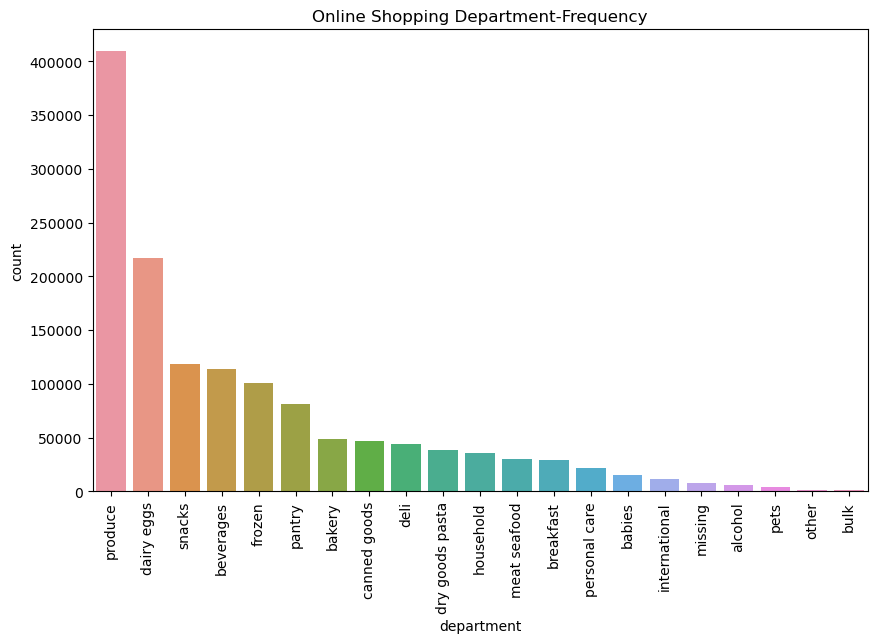

In [8]:
#Let us first analyze the department distribution

# Assuming you have df as your DataFrame
df['department'] = df['department'].astype(str)  # Ensure department is string type

# Reorder the categories by frequency
department_order = df['department'].value_counts().index

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', order=department_order)
plt.title('Online Shopping Department-Frequency')
plt.xticks(rotation=90)
plt.show()

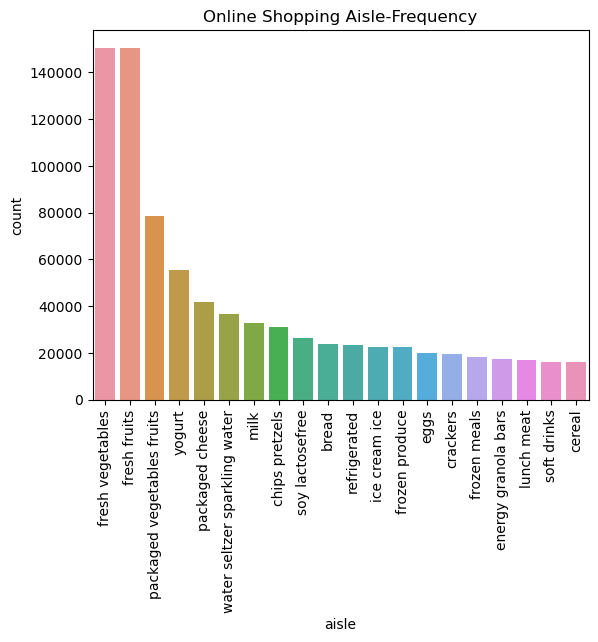

In [9]:
#Let us now analyze the aisle distribution
sns.countplot(x=df.aisle, order=df.aisle.value_counts().index[:20])
plt.title('Online Shopping Aisle-Frequency')
plt.xticks(rotation=90)
plt.show()


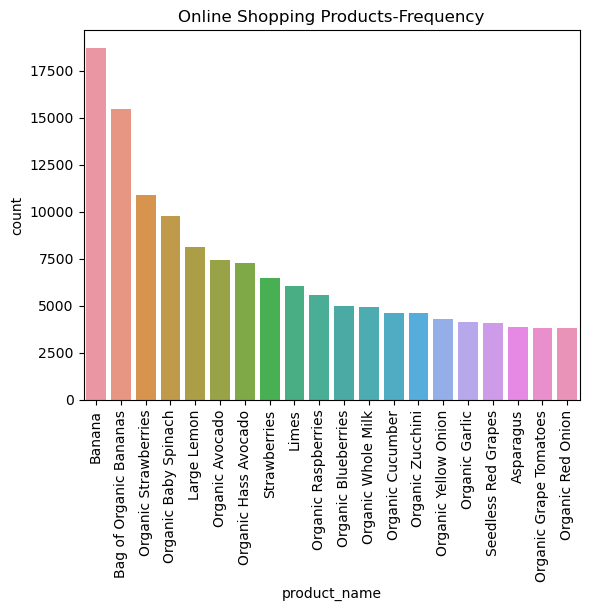

In [10]:
#Let us now analyze the products distribution

sns.countplot(x=df.product_name, order=df.product_name.value_counts().index[:20])
plt.title('Online Shopping Products-Frequency')
plt.xticks(rotation=90)
plt.show()

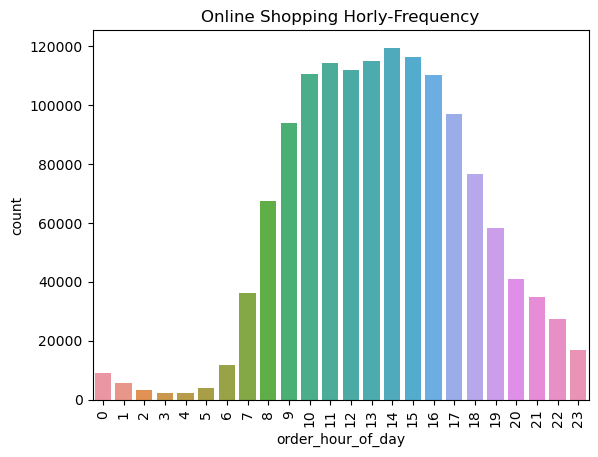

In [11]:
sns.countplot(x=df.order_hour_of_day)#, order=df.aisle.value_counts().index[:20])
plt.title('Online Shopping Horly-Frequency')
plt.xticks(rotation=90)
plt.show()

## 3. Data Preprocessing

In [12]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')


order_id                  0
user_id                   0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
aisle                     0
product_name              0
department                0
dtype: int64

Inference: The dataset doesn't have any null elements


In [13]:
# Removal of any Duplicate rows (if any)
    
counter = 0
r,c = df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df.shape[0]}')
    



Inference: The dataset doesn't have any duplicates


In [14]:
dummies_df = pd.get_dummies(data=df, prefix=['Day','Hour'], columns=['order_dow','order_hour_of_day'], drop_first=True)
dummies_df.head()


,order_id,user_id,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department,Day_1,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1187899,1,14.0,196,1,1,soft drinks,Soda,beverages,False,...,False,False,False,False,False,False,False,False,False,False
1,1187899,1,14.0,25133,2,1,packaged cheese,Organic String Cheese,dairy eggs,False,...,False,False,False,False,False,False,False,False,False,False
2,1187899,1,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs,False,...,False,False,False,False,False,False,False,False,False,False
3,1187899,1,14.0,26405,4,1,paper goods,XL Pick-A-Size Paper Towel Rolls,household,False,...,False,False,False,False,False,False,False,False,False,False
4,1187899,1,14.0,39657,5,1,candy chocolate,Milk Chocolate Almonds,snacks,False,...,False,False,False,False,False,False,False,False,False,False


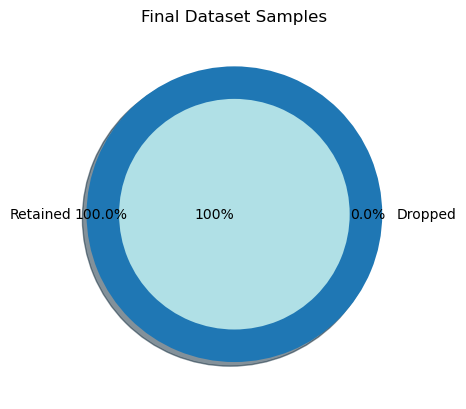


Inference:The final dataset after cleanup has 1384617 samples & 11 rows.


In [15]:
# #Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df1.shape[0], df1.shape[0]-df.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))


## 4. Data Manupulation

In [16]:
user_prod_df = dummies_df.groupby(['user_id','product_id']).agg({'order_id':'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'max',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_prod_df.head()

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
user_purchase_df = dummies_df.groupby(['user_id']).agg({         'order_id':'nunique',
                                                                 'product_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_purchase_df.head()

,user_id,order_id,product_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,11,14.0,10,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,31,30.0,12,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,9,6.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,9,6.0,8,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,18,10.0,4,18,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [18]:
product_purchase_df = dummies_df.groupby(['product_id']).agg({   'order_id':'nunique',
                                                                 'user_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
product_purchase_df.head()

,product_id,order_id,user_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,76,76,17.118421,49,14,14,10,13,14,...,5,3,4,8,1,3,0,1,4,0
1,2,4,4,10.750000,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,6,6,21.000000,6,0,0,2,0,2,...,0,0,2,0,0,0,0,0,0,0
3,4,22,22,17.272727,14,2,5,3,1,1,...,3,2,3,2,3,2,0,0,0,1
4,5,1,1,21.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp = pd.merge(left=user_prod_df,  right=user_purchase_df, on='user_id', suffixes=('','_user'))
temp.head(10)

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_user,Hour_15_user,Hour_16_user,Hour_17_user,Hour_18_user,Hour_19_user,Hour_20_user,Hour_21_user,Hour_22_user,Hour_23_user
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,26405,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,27845,1,14.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,38928,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,39657,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,46149,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
features_df = pd.merge(left=temp,  right=product_purchase_df, on='product_id', suffixes=('','_prod'))
features_df.head(10)

NameError: name 'pd' is not defined